In [1]:
!pip install openai==1.34.0

  Using cached openai-0.28.0-py3-none-any.whl.metadata (13 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
  Using cached aiohttp-3.9.5-cp312-cp312-win_amd64.whl.metadata (7.7 kB)
  Using cached charset_normalizer-3.3.2-cp312-cp312-win_amd64.whl.metadata (34 kB)
  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached urllib3-2.2.2-py3-none-any.whl.metadata (6.4 kB)
  Using cached certifi-2024.6.2-py3-none-any.whl.metadata (2.2 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached frozenlist-1.4.1-cp312-cp312-win_amd64.whl.metadata (12 kB)
  Using cached multidict-6.0.5-cp312-cp312-win_amd64.whl.metadata (4.3 kB)
  Using cached yarl-1.9.4-cp312-cp312-win_amd64.whl.metadata (32 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
Using cached openai-0.28.0-py3-none-any.whl (76 

In [4]:
import os
os.environ["OPENAI_API_KEY"]=""


from openai import OpenAI
client = OpenAI()


response = client.completions.create(
  model="gpt-3.5-turbo-instruct",
  prompt="Write a tagline for an ice cream shop."
)
print(response.choices[0].text)



"Scoops of Happiness in Every Cone!" 


In [17]:
sql = "sqlite3"

# question = "사람들이 2023년에 가장 좋아한 술의 정보"
question = "Names of people's favorite alcohol in 2023"
#question = "People sort the drinks with the best overall rating in 2023 in descending order of score."

contents = '''`
### Instructions:
Your task is convert a question into a SQL query, given a {sql} database schema.
Adhere to these rules:
- **Deliberately go through the question and database schema word by word** to appropriately answer the question
- **Use Table Aliases** to prevent ambiguity. For example, `SELECT table1.col1, table2.col1 FROM table1 JOIN table2 ON table1.id = table2.id`.
- When creating a ratio, always cast the numerator as float

### Input:
Generate a SQL query about the `{question}`.
This query will run on a database whose schema is represented in this string:

Table Name: soolpan_user
    Column: id, Type: integer, PRIMARY KEY, -- Unique ID for each user
    Column: email, Type: varchar(254),  -- user`s email
    Column: password, Type: varchar(128), -- user`s password
    Column: level, Type: varchar(8),  -- level of user
    Column: register_date, Type: datetime, -- user`s register_date
Table Name: Comments_data
    Column: id, Type: integer, PRIMARY KEY -- Unique ID for each comment
    Column: body, Type: text,  -- Comment body
    Column: created_at, Type: datetime, -- Date of comment written
    Column: name_id, Type: bigint,  -- Unique ID for each user
    Column: post_id, Type: integer, -- Unique ID for each product
    Column: carbon, Type: integer, -- carbonation rating of alcohol in the comments
    Column: color, Type: integer, --  color rating of the alcohol in the comments
    Column: flavor, Type: integer, -- Taste rating of alcohol in the comments
    Column: sour, Type: integer,  -- Sour rating of alcohol in the comments
    Column: sweet, Type: integer,  -- Sweet rating of alcohol in the comments
    Column: total, Type: integer, -- Total rating of alcohol in the comments
Table Name: favorite_database
    Column: id, Type: integer, PRIMARY KEY -- Unique ID for each product
    Column: like, Type: integer, -- number of times a product has been favorited
    Column: register_date, Type: datetime, -- Date the user liked
    Column: name_id, Type: bigint, -- Unique ID for each user
    Column: post_id, Type: integer, -- Unique ID for each product
Table Name: traditional_liq 
    Column: id, Type: integer, PRIMARY KEY -- Unique ID for each product
    Column: name, Type: varchar(256),  -- name of each product
    Column: company, Type: varchar(256),  -- The company that created the product
    Column: mtrl, Type: varchar(256), -- raw materials for products
    Column: dsc, Type: varchar(512), -- Detailed description of product
    Column: img, Type: varchar(256), -- Image link for product
    Column: std, Type: varchar(256), -- Product capacity and strength
    Column: like, Type: integer, -- Total number of times a product has been favorited
### Answer:
'''.format(sql=sql, question=question)

In [18]:
response =  client.completions.create(
            model="gpt-3.5-turbo-instruct",
        prompt=contents,    
        temperature=0,
        max_tokens=2000
        )

In [19]:
result = response.choices[0].text
print(result)


SELECT traditional_liq.name, COUNT(favorite_database.id) AS total_likes
FROM traditional_liq
JOIN favorite_database ON traditional_liq.id = favorite_database.post_id
WHERE favorite_database.register_date BETWEEN '2023-01-01' AND '2023-12-31'
GROUP BY traditional_liq.name
ORDER BY total_likes DESC;


In [20]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('./data/db.sqlite3')
cursor = conn.cursor()

df = pd.read_sql_query(result, conn)
df

,name,total_likes
0,하얀허브,2
1,프렌치 린넨,2
2,유톡자톡,2
3,오미자씨,2
4,산정호수 솔잎주,2
5,행운 생유자 동동주,1
6,해창 생막걸리,1
7,팔로미 더 블랙 26 (8ROMI 19+ THE BLACK 26),1
8,타락40,1
9,추사백40 사과 증류식 소주,1


In [21]:
sql = "sqlite3"

#question = "사람들이 2023년에 가장 좋아한 술의 정보"
question = "Names of people's favorite alcohol in 2023"
# question = "People sort the drinks with the best overall rating in 2023 in descending order of score."
contents2 = '''
### Instructions:
Your task is convert a SQL query into python code for matplotlib chart, given a dataframe.
Adhere to these rules:
You must use "import matplotlib.pyplot as plt", "import pandas as pd", "import numpy as np".
df must be defined in python code with using a given df.
font_name is "Malgun Gothic" for xticks and yticks and title.
Before save the plt, "plt.tight_layout()" must be written.
Save the plt name as "test.png" with dpi=50, and the file must create.
                
### Input:
{df} is a dataframe that you generate python code for plotly chart.
df={df}
### Solution:
'''.format(df=df)

In [22]:
response =  client.completions.create(
            model="gpt-3.5-turbo-instruct",
        prompt=contents2,    
        temperature=0.1,
        max_tokens=2000
        )

In [23]:
python_code = response.choices[0].text
python_code2 = python_code.encode('utf-8')
print(python_code)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.DataFrame({'name': ['하얀허브', '프렌치 린넨', '유톡자톡', '오미자씨', '산정호수 솔잎주', '행운 생유자 동동주', '해창 생막걸리', '팔로미 더 블랙 26 (8ROMI 19+ THE BLACK 26)', '타락40', '추사백40 사과 증류식 소주', '추사 애플와인', '찰진', '인천 생 소생주', '삼해주', '산정호수 동정춘막걸리', '두레앙 브랜디', '궁예의 눈물', '감성 막걸리'], 'total_likes': [2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]})

plt.bar(df['name'], df['total_likes'])
plt.xticks(rotation=90, fontname='Malgun Gothic')
plt.yticks(fontname='Malgun Gothic')
plt.title('Total Likes by Name', fontname='Malgun Gothic')
plt.tight_layout()
plt.savefig('test.png', dpi=50)


In [25]:
import os

# Specify the file path you want to delete
file_path = "test.png"

# Check if the file exists before attempting to delete it
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"{file_path} has been deleted.")
else:
    print(f"{file_path} does not exist.")

test.png does not exist.


In [27]:
!pip install matplotlib

     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.5 kB ? eta -:--:--
     ------------------ ------------------ 81.9/165.5 kB 919.0 kB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 1.4 MB/s eta 0:00:00
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB 960.0 kB/s eta 0:00:09
    --------------------------------------- 0.1/8.0 MB 1.3 MB/s eta 0:00:07
    --------------------------------------- 0.1/8.0 MB 1.2 MB/s eta 0:00:07
    --------------------------------------- 0.1/8.0 MB 1.2 MB/s eta 0:00:07
    --------------------------------------- 0.2/8.0 MB 701.4 kB/s eta 0:00:12
    --------------------------------------- 0.2/8.0 MB 701.4 kB/s eta 0:00:12
    --------------------------------------- 0.2/8.0 MB 653.6 kB/s eta 0:00:12
   - -------------

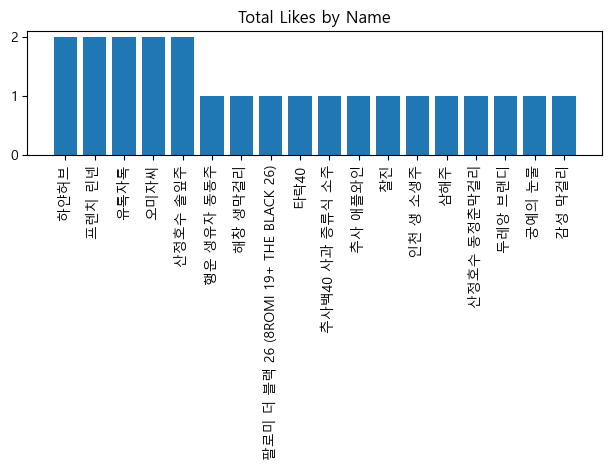

In [24]:
exec(python_code2)